We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [46]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-04-14 12:17:34--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.78, 13.227.223.89, 13.227.223.117, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 467384 (456K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 456.43K  --.-KB/s    in 0.04s   

2020-04-14 12:17:34 (12.7 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [467384/467384]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [47]:
import pandas as pd
import numpy as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [48]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0
1,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
3,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-10,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
5,2020-04-09,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
6,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
7,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
8,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
9,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0


Use a count on columns to see how many missing values we have. We would like to compare countries by geoId.

In [49]:
df.count()

dateRep                    10742
day                        10742
month                      10742
year                       10742
cases                      10742
deaths                     10742
countriesAndTerritories    10742
geoId                      10711
countryterritoryCode       10635
popData2018                10675
dtype: int64

Because we seem to miss some geoID entries, we will drop them. The resulting dataframe will be pivoted so we get one row per date, columns by geoId and the number of new cases and deaths in the cells. Again, show the first 10 rows to check our pivot.

In [50]:
df_geo = df.dropna().pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo.head(10)

cases                                           ... deaths          \
geoId         AD   AE   AF  AG  AL   AM  AO  AR   AT   AU  ...     VC  VE  VG   
dateRep                                                    ...                  
2019-12-31   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-05   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-06   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-07   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-08   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-09   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
dateRep                                  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-05 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-06 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-07 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-08 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-09 NaN  0.0 NaN NaN NaN NaN NaN  

[10 rows x 400 columns]

Looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to see what's there.

In [51]:
df_geo.describe()

cases                                                          \
geoId         AD          AE         AF         AG         AL         AM   
count  32.000000  100.000000  96.000000  26.000000  37.000000  97.000000   
mean   20.187500   45.210000   6.927083   0.884615  12.621622  10.711340   
std    12.862643  111.562031  14.868012   1.608152   8.138903  19.626703   
min     0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   
25%    10.500000    0.000000   0.000000   0.000000   6.000000   0.000000   
50%    19.500000    0.000000   0.000000   0.000000  11.000000   0.000000   
75%    28.000000   11.250000   3.000000   1.750000  17.000000  14.000000   
max    43.000000  481.000000  61.000000   6.000000  29.000000  92.000000   

                                                       ... deaths             \
geoId         AO          AR           AT          AU  ...     VC         VE   
count  24.000000   39.000000   106.000000  106.000000  ...   22.0  31.000000   
mean    0.791667   58.256410   132.481132   60.056604  ...    0.0   0.290323   
std     1.141287   53.319651   236.320051  124.859985  ...    0.0   0.642575   
min     0.000000    0.000000     0.000000    0.000000  ...    0.0   0.000000   
25%     0.000000   10.000000     0.000000    0.000000  ...    0.0   0.000000   
50%     0.000000   55.000000     0.000000    1.000000  ...    0.0   0.000000   
75%     1.250000   87.000000   192.750000   51.750000  ...    0.0   0.000000   
max     4.000000  186.000000  1141.000000  611.000000  ...    0.0   2.000000   

                                                                                
geoId    VG         VI     VN         XK   YE         ZA         ZM         ZW  
count  19.0  21.000000  102.0  30.000000  5.0  38.000000  27.000000  25.000000  
mean    0.0   0.047619    0.0   0.266667  0.0   0.710526   0.074074   0.120000  
std     0.0   0.218218    0.0   0.639684  0.0   1.373650   0.266880   0.331662  
min     0.0   0.000000    0.0   0.000000  0.0   0.000000   0.000000   0.000000  
25%     0.0   0.000000    0.0   0.000000  0.0   0.000000   0.000000   0.000000  
50%     0.0   0.000000    0.0   0.000000  0.0   0.000000   0.000000   0.000000  
75%     0.0   0.000000    0.0   0.000000  0.0   1.000000   0.000000   0.000000  
max     0.0   1.000000    0.0   2.000000  0.0   6.000000   1.000000   1.000000  

[8 rows x 400 columns]

Get to know your data by visualization, in this case the number of new cases per day for my home country.

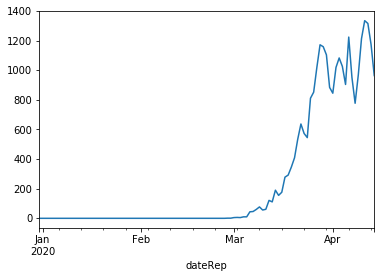

In [52]:
df_geo['cases']['NL'].plot()

What would China look like?

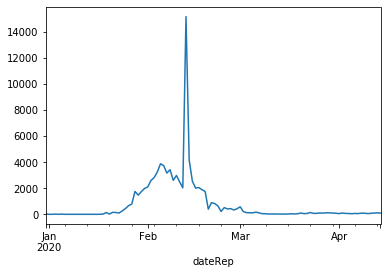

In [53]:
df_geo['cases']['CN'].plot()

The big spike in the middle was a change in counting, where they decided to count an extra 15000 cases.

To see the growth in number of cases, we can use cumulative sum, in this case we show CN and NL.

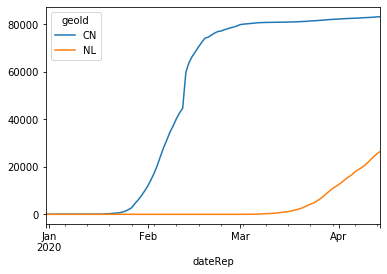

In [85]:
df_geo['cases'][['CN', 'NL']].cumsum().plot()

Because of the large difference in numbers, it may help to use a logarithmic scale. We can change the data passed to the plot using NumPy.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


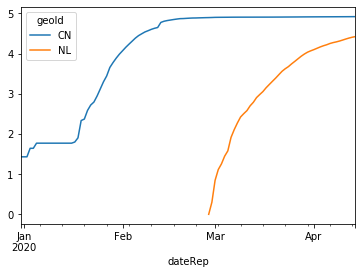

In [55]:
np.log10(df_geo['cases'][['CN', 'NL']].cumsum()).plot()

Alternatively, we ask the plotter to use a logarithmic scale.

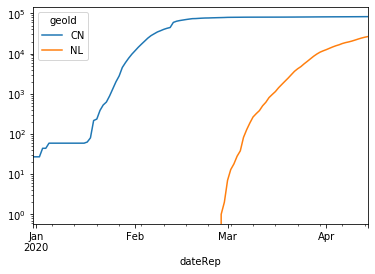

In [56]:
df_geo['cases'][['CN', 'NL']].cumsum().plot(logy=True)

This clearly shows the phases in CN, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For NL we are still at the phase where measures start to take effect. Also, no real startup curve there.

Perhaps some other countries also show this effect.

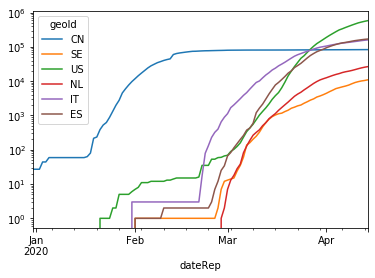

In [89]:
df_geo['cases'][['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum().plot(logy=True)

Another interesting measure would be relative growth in number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the loc method.

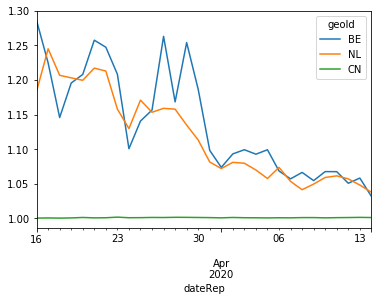

In [90]:
(df_geo.cumsum() / df_geo.shift().cumsum())['cases'][['BE', 'NL', 'CN']].loc['20200316':].plot()

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double by some logarithmic magic. For NL the number doubled every one or two days in the beginning but now it doubles in over 10 days, which is a good sign.

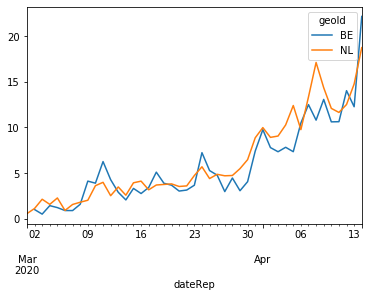

In [68]:
(np.log10(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum()))['cases'][['BE', 'NL']].loc['20200301':].plot()

Rolling window functions can be used to smooth a curve, in this case the moving 5 day mean new cases for BE and NL.

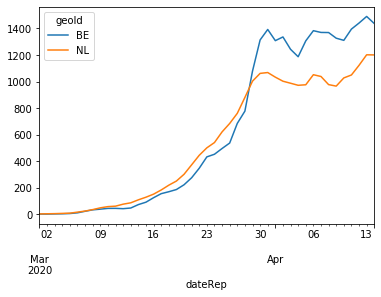

In [69]:
df_geo['cases'][['BE', 'NL']].rolling(5).mean().loc['20200301':].plot()

The default window function is a rectangle, where all values are weighed equally. Using another window function will weigh the values in the window differently, such as the triangle function which will focus more on the values in the center of the window.

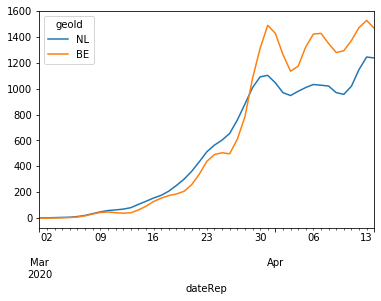

In [70]:
df_geo['cases'][['BE', 'NL']].rolling(5, win_type='triang').mean().loc['20200301':].plot()

Let's look at 'the curve' which we are supposed to flatten. It shows the number of active cases (the Infected category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently 15 is used by EU CDC), so we only sum new cases from the last 14 days. By leaving out older infections (the Removed category in SIR) this shows us the current number of infections. China is clearly through their (first) curve. Italy and Spain seem to be over the top.
We use a gaussian window to mimic the natural spread in recovery, with a standard deviation of 7 days.

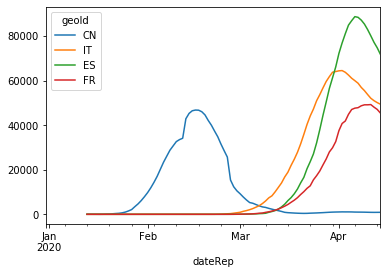

In [75]:
df_geo['cases'][['CN', 'IT', 'ES', 'FR']].rolling(14, win_type='gaussian').sum(std=7).plot()

Assuming that we see about 10% of currently infected in ICU, we can monitor the capacity with the following graph.

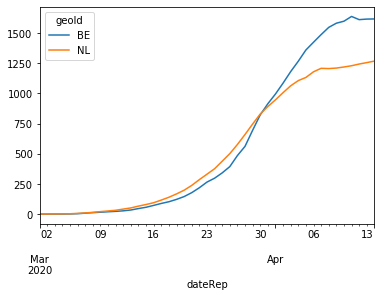

In [87]:
(df_geo['cases'][['BE', 'NL']].rolling(14, win_type='gaussian').sum(std=7).loc['20200301':] / 10).plot()

For NL this more or less corresponds with the official ICU data, for BE it overestimates a bit.

In [79]:
(df_geo['cases'][['BE', 'NL']].rolling(14, win_type='gaussian').sum(std=7).loc['20200301':] / 10).tail(7)

geoId,BE,NL
dateRep,,
2020-04-08,1546.736224,1205.533929
2020-04-09,1581.284035,1209.722164
2020-04-10,1597.883899,1218.683408
2020-04-11,1637.374791,1228.963330
2020-04-12,1610.898744,1243.112167
2020-04-13,1615.449543,1255.013445
2020-04-14,1616.669627,1267.478245


Keep exploring! Stay home, wash your hands, keep your distance.